# 집값 데이터 분석 

## 평균 단위 매매 가격 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator 
import koreanize_matplotlib 
import seaborn as sns 

import warnings 
warnings.filterwarnings(action='ignore') 

In [2]:
data_trade_raw = pd.read_excel("../data/housing_data/평균단위매매가격_종합_시군구권역별_수정.xlsx", skiprows=10, nrows=26, usecols='A:ET') 
print(data_trade_raw.info()) 
data_trade_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 150 entries, 지 역 to 2024년 05월
dtypes: int64(138), object(12)
memory usage: 29.4+ KB
None


,지 역,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,...,2023년 08월,2023년 09월,2023년 10월,2023년 11월,2023년 12월,2024년 01월,2024년 02월,2024년 03월,2024년 04월,2024년 05월
0,전국,2610,2608,2604,2598,2591,2581,2569,2556,2544,...,4529,4549,4565,4568,4563,4609,4601,4595,4595,4598
1,서울,5465,5453,5432,5402,5381,5348,5319,5278,5245,...,10268,10315,10349,10360,10351,10397,10387,10390,10408,10432
2,경기,2969,2967,2960,2953,2944,2931,2914,2895,2877,...,5299,5337,5368,5375,5368,5423,5409,5397,5394,5393
3,경부1권,4426,4422,4415,4404,4392,4372,4343,4310,4271,...,8749,8823,8883,8909,8900,8993,8960,8929,8912,8915
4,경부2권,2929,2928,2920,2909,2901,2886,2879,2864,2842,...,5321,5365,5393,5402,5395,5425,5409,5403,5410,5414


In [3]:
data_trade_raw.set_index('지 역', inplace=True) 
data_trade_raw = data_trade_raw.transpose() 
data_trade_raw.head() 

지 역,전국,서울,경기,경부1권,경부2권,서해안권,동부1권,동부2권,경의권,경원권,...,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2012년 01월,2610,5465,2969,4426,2929,2784,2815,1231,2790,2018,...,2095,-,1067,1258,1046,1110,781,945,1713,943
2012년 02월,2608,5453,2967,4422,2928,2780,2813,1232,2790,2020,...,2112,-,1072,1260,1048,1112,783,947,1711,962
2012년 03월,2604,5432,2960,4415,2920,2778,2804,1231,2778,2017,...,2126,-,1075,1265,1054,1120,782,952,1712,964
2012년 04월,2598,5402,2953,4404,2909,2775,2794,1230,2765,2015,...,2141,-,1078,1270,1058,1122,786,956,1709,970
2012년 05월,2591,5381,2944,4392,2901,2768,2779,1230,2752,2011,...,2154,-,1078,1275,1062,1120,787,960,1705,983


In [4]:
data_trade = data_trade_raw[['서울', '경기']] 
data_trade = data_trade.astype('int') 
print(data_trade.info()) 
data_trade.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 2012년 01월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      149 non-null    int64
 1   경기      149 non-null    int64
dtypes: int64(2)
memory usage: 3.5+ KB
None


지 역,서울,경기
2012년 01월,5465,2969
2012년 02월,5453,2967
2012년 03월,5432,2960
2012년 04월,5402,2953
2012년 05월,5381,2944


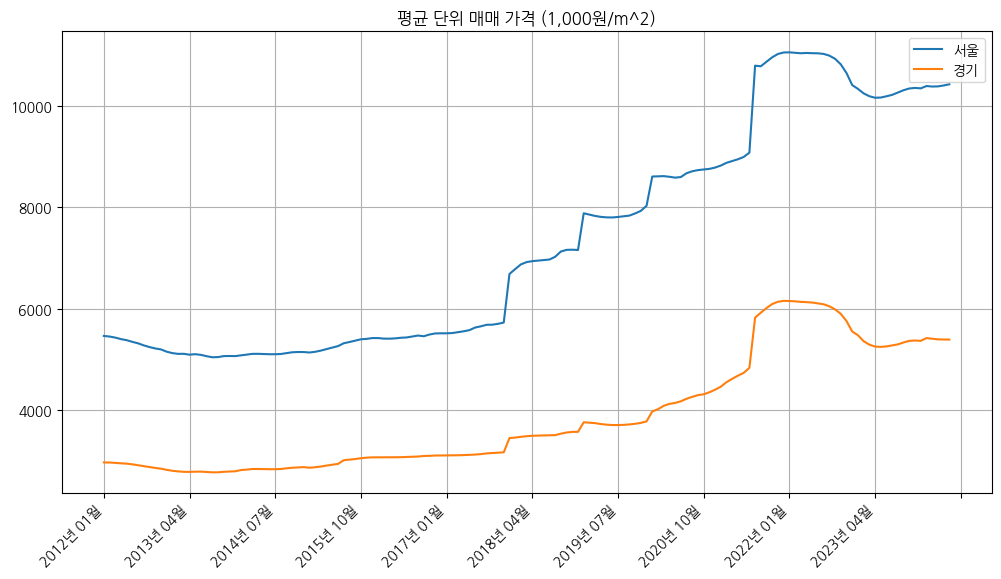

In [5]:
# xticks manipulation 
data = data_trade 
dates = pd.date_range('2012-01-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('평균 단위 매매 가격 (1,000원/m^2)')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [6]:
data_trade.to_csv('../data/housing_data/custom_price_trade.csv') 

## 평균 단위 전세 가격 

In [7]:
data_js_raw = pd.read_excel("../data/housing_data/평균단위전세가격_종합_시군구권역별_수정.xlsx", skiprows=10, nrows=30, usecols='A:ET') 
print(data_js_raw.info()) 
data_js_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 150 entries, 지 역 to 2024년 05월
dtypes: int64(138), object(12)
memory usage: 35.3+ KB
None


,지 역,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,...,2023년 08월,2023년 09월,2023년 10월,2023년 11월,2023년 12월,2024년 01월,2024년 02월,2024년 03월,2024년 04월,2024년 05월
0,전국,1476,1477,1478,1477,1476,1474,1469,1467,1472,...,2668,2679,2696,2709,2716,2756,2759,2762,2767,2773
1,수도권,2020,2022,2021,2016,2011,2006,1999,1995,2002,...,3890,3912,3943,3967,3979,4028,4034,4044,4055,4069
2,지방권,971,973,976,978,980,981,980,979,980,...,1613,1615,1618,1622,1623,1651,1650,1648,1647,1647
3,6대광역시,1307,1307,1310,1313,1316,1316,1314,1312,1315,...,2168,2172,2177,2181,2182,2221,2221,2223,2226,2229
4,5대광역시,1311,1311,1316,1319,1322,1322,1320,1317,1319,...,2126,2126,2129,2133,2134,2172,2170,2168,2168,2167


In [8]:
data_js_raw.set_index('지 역', inplace=True) 
data_js_raw = data_js_raw.transpose() 
data_js_raw.head() 

지 역,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,경기,경부1권,...,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남
2012년 01월,1476,2020,971,1307,1311,1142,750,2723,1669,2477,...,1325,1422,-,681,836,651,765,516,626,1056
2012년 02월,1477,2022,973,1307,1311,1144,752,2725,1671,2481,...,1312,1435,-,685,837,655,765,517,628,1055
2012년 03월,1478,2021,976,1310,1316,1144,754,2723,1669,2475,...,1305,1449,-,691,833,661,770,513,633,1056
2012년 04월,1477,2016,978,1313,1319,1145,757,2714,1667,2470,...,1300,1461,-,692,836,664,773,516,635,1057
2012년 05월,1476,2011,980,1316,1322,1144,758,2704,1663,2464,...,1293,1472,-,692,839,667,772,518,638,1055


In [9]:
data_js = data_js_raw[['서울', '경기']] 
data_js = data_js.astype('int') 
print(data_js.info()) 
data_js.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 2012년 01월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      149 non-null    int64
 1   경기      149 non-null    int64
dtypes: int64(2)
memory usage: 3.5+ KB
None


지 역,서울,경기
2012년 01월,2723,1669
2012년 02월,2725,1671
2012년 03월,2723,1669
2012년 04월,2714,1667
2012년 05월,2704,1663


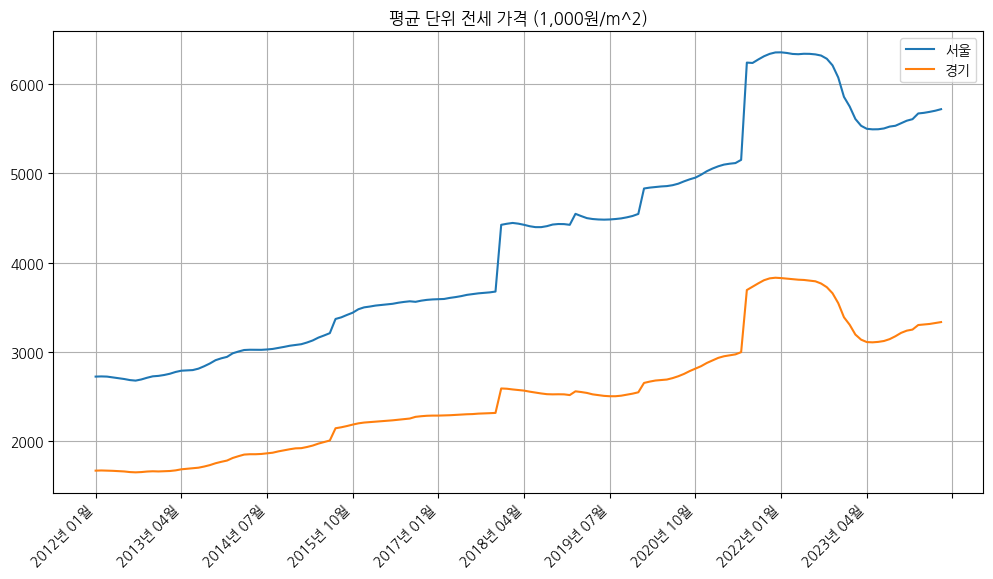

In [10]:
data = data_js
dates = pd.date_range('2012-01-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('평균 단위 전세 가격 (1,000원/m^2)')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [11]:
data_js.to_csv('../data/housing_data/custom_price_js.csv') 

## 매매가격지수 데이터 

In [12]:
data_trade_factor_raw = pd.read_excel("../data/housing_data/매매가격지수_종합_시군구권역별_수정.xlsx", skiprows=10, nrows=20, usecols='A:SA') 
print(data_trade_factor_raw.info()) 
data_trade_factor_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 495 entries, 지 역 to Unnamed: 494
dtypes: object(495)
memory usage: 73.6+ KB
None


,지 역,2003년 11월,Unnamed: 2,2003년 12월,Unnamed: 4,2004년 01월,Unnamed: 6,2004년 02월,Unnamed: 8,2004년 03월,...,2024년 01월,Unnamed: 486,2024년 02월,Unnamed: 488,2024년 03월,Unnamed: 490,2024년 04월,Unnamed: 492,2024년 05월,Unnamed: 494
0,NaN,지수,변동률,지수,변동률,지수,변동률,지수,변동률,지수,...,지수,변동률,지수,변동률,지수,변동률,지수,변동률,지수,변동률
1,전국,61.452,-,60.963,-0.8,60.652,-0.51,60.744,0.15,60.842,...,96.04,-0.14,95.902,-0.14,95.787,-0.12,95.738,-0.05,95.717,-0.02
2,서울,55.603,-,55.203,-0.72,55.055,-0.27,55.275,0.4,55.506,...,96.625,-0.12,96.539,-0.09,96.537,0,96.622,0.09,96.755,0.14
3,경기,56.37,-,55.992,-0.67,55.681,-0.56,55.741,0.11,55.876,...,94.964,-0.23,94.769,-0.21,94.591,-0.19,94.525,-0.07,94.449,-0.08
4,인천,55.916,-,55.379,-0.96,55.047,-0.6,54.982,-0.12,54.904,...,94.029,-0.15,93.93,-0.1,93.871,-0.06,93.826,-0.05,93.893,0.07


In [13]:
data_trade_factor_raw.set_index('지 역', inplace=True) 
drop_idx = list(range(1, data_trade_factor_raw.shape[1], 2)) 
data_trade_factor_raw.drop(data_trade_factor_raw.columns[drop_idx], axis=1, inplace=True) 
data_trade_factor_raw.drop(data_trade_factor_raw.index[0], inplace=True) 
data_trade_factor_raw = data_trade_factor_raw.transpose() 
data_trade_factor_raw.head() 

지 역,전국,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2003년 11월,61.452,55.603,56.37,55.916,66.401,58.185,61.892,59.585,56.745,-,73.392,69.174,80.303,70.257,70.507,77.933,70.243,99.854
2003년 12월,60.963,55.203,55.992,55.379,65.705,57.463,61.547,58.68,56.277,-,73.442,68.309,79.123,70.045,69.598,77.631,69.944,99.811
2004년 01월,60.652,55.055,55.681,55.047,65.177,57.027,61.256,58.712,55.868,-,73.395,68.1,78.893,69.849,69.38,77.189,69.688,95.083
2004년 02월,60.744,55.275,55.741,54.982,65.123,56.961,61.241,59.071,56.082,-,73.792,68.177,79.495,70.068,69.223,77.034,69.879,93.104
2004년 03월,60.842,55.506,55.876,54.904,65.13,57.133,61.298,59.252,56.284,-,74.196,68.246,79.914,69.968,68.647,76.908,70.147,89.198


In [14]:
data_trade_factor = data_trade_factor_raw[['서울', '경기']] 
data_trade_factor = data_trade_factor.astype('float') 
print(data_trade_factor.info()) 
data_trade_factor.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 2003년 11월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      247 non-null    float64
 1   경기      247 non-null    float64
dtypes: float64(2)
memory usage: 5.8+ KB
None


지 역,서울,경기
2003년 11월,55.603,56.370
2003년 12월,55.203,55.992
2004년 01월,55.055,55.681
2004년 02월,55.275,55.741
2004년 03월,55.506,55.876


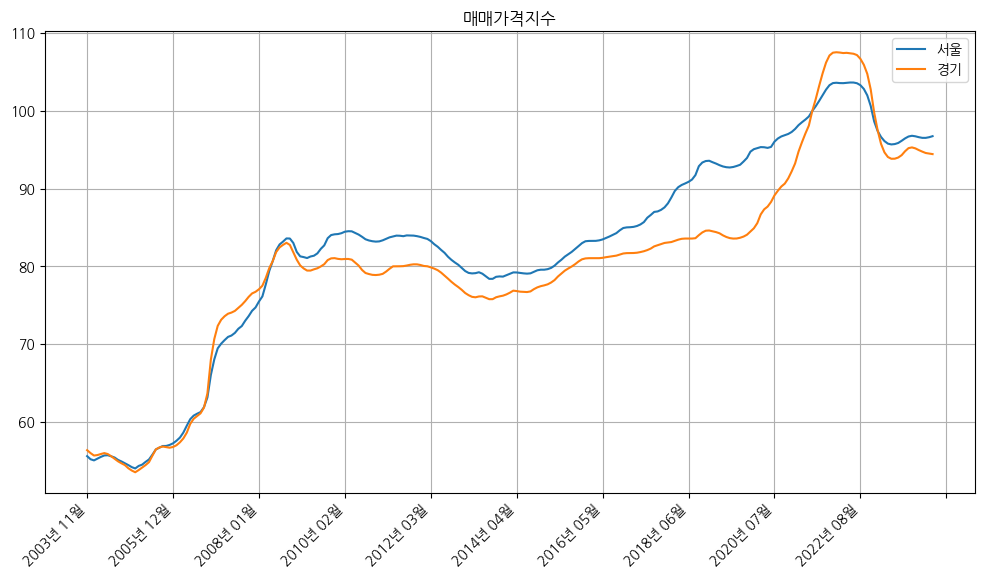

In [15]:
data = data_trade_factor
dates = pd.date_range('2003-11-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('매매가격지수')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [16]:
data_trade_factor.to_csv('../data/housing_data/custom_factor_trade.csv') 

## 전세가격지수 데이터 

In [17]:
data_js_factor_raw = pd.read_excel("../data/housing_data/전세가격지수_종합_시군구권역별_수정.xlsx", skiprows=10, nrows=20, usecols='A:SA') 
print(data_js_factor_raw.info()) 
data_js_factor_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 495 entries, 지 역 to Unnamed: 494
dtypes: object(495)
memory usage: 73.6+ KB
None


,지 역,2003년 11월,Unnamed: 2,2003년 12월,Unnamed: 4,2004년 01월,Unnamed: 6,2004년 02월,Unnamed: 8,2004년 03월,...,2024년 01월,Unnamed: 486,2024년 02월,Unnamed: 488,2024년 03월,Unnamed: 490,2024년 04월,Unnamed: 492,2024년 05월,Unnamed: 494
0,NaN,지수,변동률,지수,변동률,지수,변동률,지수,변동률,지수,...,지수,변동률,지수,변동률,지수,변동률,지수,변동률,지수,변동률
1,전국,60.353,-,59.575,-1.29,59.21,-0.61,59.307,0.16,59.467,...,92.545,0.05,92.57,0.03,92.614,0.05,92.677,0.07,92.791,0.12
2,서울,55.598,-,54.716,-1.59,54.381,-0.61,54.458,0.14,54.551,...,91.104,0.16,91.215,0.12,91.386,0.19,91.546,0.18,91.782,0.26
3,경기,52.449,-,51.745,-1.34,51.378,-0.71,51.493,0.22,51.756,...,90.315,0.13,90.425,0.12,90.547,0.13,90.731,0.2,90.961,0.25
4,인천,56,-,55.162,-1.5,54.558,-1.1,54.523,-0.07,54.581,...,88.149,0.01,88.357,0.24,88.732,0.42,88.998,0.3,89.417,0.47


In [18]:
data_js_factor_raw.set_index('지 역', inplace=True) 
drop_idx = list(range(1, data_js_factor_raw.shape[1], 2)) 
data_js_factor_raw.drop(data_js_factor_raw.columns[drop_idx], axis=1, inplace=True) 
data_js_factor_raw.drop(data_js_factor_raw.index[0], inplace=True) 
data_js_factor_raw = data_js_factor_raw.transpose() 
data_js_factor_raw.head() 

지 역,전국,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2003년 11월,60.353,55.598,52.449,56,67.811,62.161,61.767,56.826,58.332,-,75.433,64.815,69.015,66.693,64.299,79.758,69.397,89.606
2003년 12월,59.575,54.716,51.745,55.162,67.137,60.596,61.614,56.239,57.66,-,75.069,63.776,67.605,66.408,64.207,79.487,68.788,89.591
2004년 01월,59.21,54.381,51.378,54.558,66.698,59.341,61.359,56.458,57.554,-,75.094,63.486,67.436,66.312,64.004,79.034,68.657,91.191
2004년 02월,59.307,54.458,51.493,54.523,66.662,59.217,61.259,56.948,57.952,-,75.684,64.152,68.35,66.459,64.007,78.935,68.64,89.522
2004년 03월,59.467,54.551,51.756,54.581,66.856,59.227,61.733,56.975,58.205,-,76.207,63.869,68.97,66.67,64.152,78.86,68.909,87.391


In [19]:
data_js_factor = data_js_factor_raw[['서울', '경기']] 
data_js_factor = data_js_factor.astype('float') 
print(data_js_factor.info()) 
data_js_factor.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 2003년 11월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      247 non-null    float64
 1   경기      247 non-null    float64
dtypes: float64(2)
memory usage: 5.8+ KB
None


지 역,서울,경기
2003년 11월,55.598,52.449
2003년 12월,54.716,51.745
2004년 01월,54.381,51.378
2004년 02월,54.458,51.493
2004년 03월,54.551,51.756


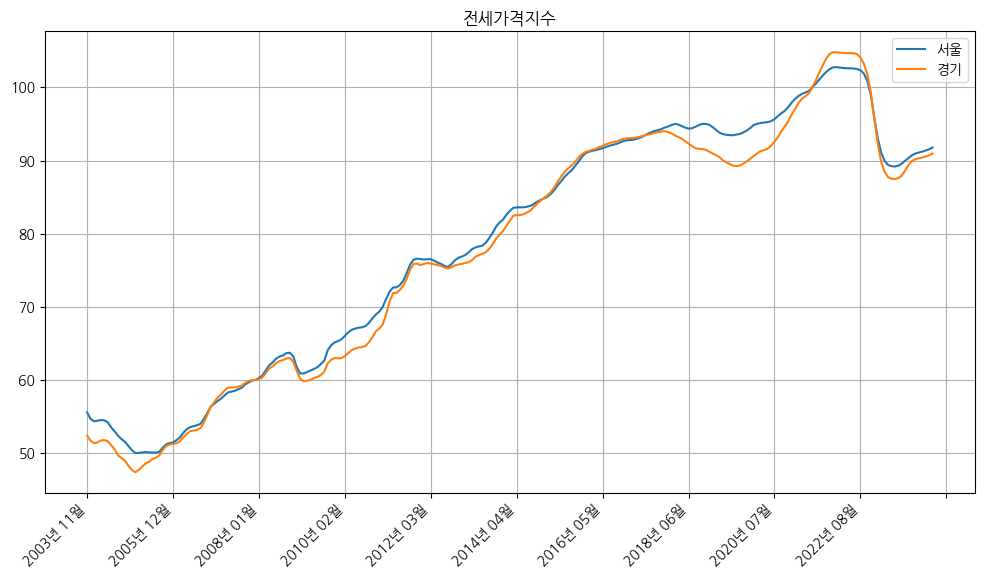

In [20]:
data = data_js_factor
dates = pd.date_range('2003-11-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('전세가격지수')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [21]:
data_js_factor.to_csv('../data/housing_data/custom_factor_js.csv') 

## 월별 주택 거래량 

In [22]:
data_trade_count_raw = pd.read_excel("../data/housing_data/월별_주택거래_수정.xlsx", skiprows=10, nrows=20, usecols="A:QA") 
print(data_trade_count_raw.info()) 
data_trade_count_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 443 entries, 지 역 to Unnamed: 442
dtypes: object(443)
memory usage: 65.9+ KB
None


,지 역,2006년 01월,Unnamed: 2,2006년 02월,Unnamed: 4,2006년 03월,Unnamed: 6,2006년 04월,Unnamed: 8,2006년 05월,...,2024년 01월,Unnamed: 434,2024년 02월,Unnamed: 436,2024년 03월,Unnamed: 438,2024년 04월,Unnamed: 440,2024년 05월,Unnamed: 442
0,NaN,동(호),면적,동(호),면적,동(호),면적,동(호),면적,동(호),...,동(호),면적,동(호),면적,동(호),면적,동(호),면적,동(호),면적
1,전국,77173,7380,103718,8535,133120,11005,118127,9681,121835,...,81330,6248,70792,5383,82007,6262,92016,7072,81023,6231
2,서울,11134,976,18818,1599,26501,2173,24970,2046,27652,...,9121,570,7780,529,7991,522,10688,745,10804,760
3,부산,5722,520,7428,643,8117,707,7503,633,7764,...,6817,513,4220,298,4654,332,4444,322,4298,304
4,대구,4743,427,6265,569,6779,614,6000,565,5354,...,3280,266,2717,218,3267,262,3547,294,3433,281


In [23]:
data_trade_count_raw.set_index('지 역', inplace=True) 
drop_idx = list(range(1, data_trade_count_raw.shape[1], 2)) 
data_trade_count_raw.drop(data_trade_count_raw.columns[drop_idx], axis=1, inplace=True) 
data_trade_count_raw.drop(data_trade_count_raw.index[0], inplace=True) 
data_trade_count_raw = data_trade_count_raw.transpose() 
data_trade_count_raw.head() 

지 역,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2006년 01월,77173,11134,5722,4743,3638,4046,2699,1821,-,20852,2408,1920,2960,2383,1149,4802,5559,1337
2006년 02월,103718,18818,7428,6265,5856,4338,3801,2888,-,25701,3289,3679,4244,2846,1717,5759,5965,1124
2006년 03월,133120,26501,8117,6779,7289,5867,6785,3612,-,36072,4165,3773,5234,3363,2554,5774,5991,1244
2006년 04월,118127,24970,7503,6000,7007,4971,4037,3218,-,33258,3130,2510,4351,3430,2291,5326,5653,472
2006년 05월,121835,27652,7764,5354,7419,3498,3261,3713,-,36701,3411,2871,3769,2721,2700,4916,5533,552


In [24]:
data_trade_count = data_trade_count_raw[['서울', '경기']] 
data_tradde_count = data_trade_count.astype('int') 
print(data_trade_count.info()) 
data_trade_count.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 2006년 01월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서울      221 non-null    object
 1   경기      221 non-null    object
dtypes: object(2)
memory usage: 5.2+ KB
None


지 역,서울,경기
2006년 01월,11134,20852
2006년 02월,18818,25701
2006년 03월,26501,36072
2006년 04월,24970,33258
2006년 05월,27652,36701


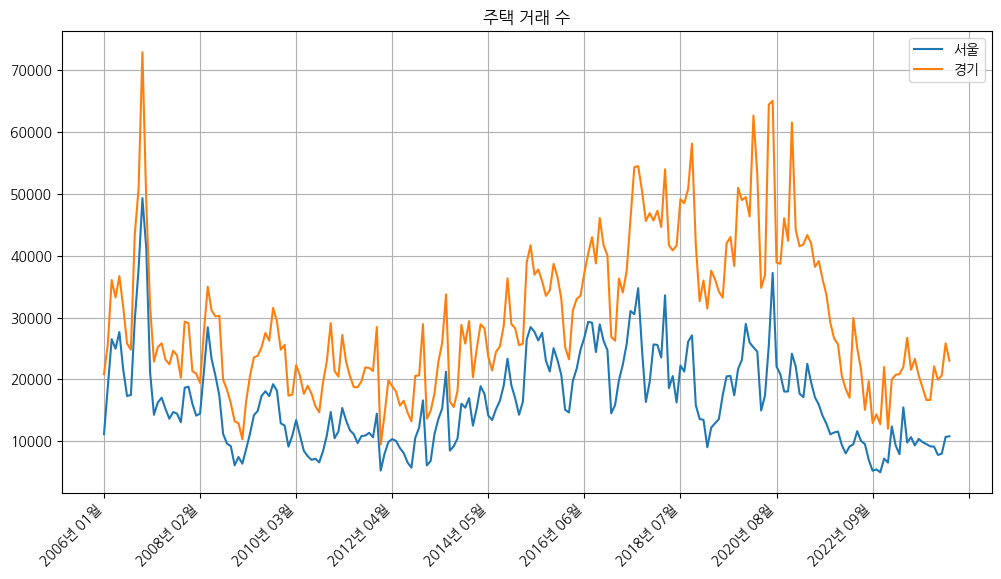

In [25]:
data = data_trade_count
dates = pd.date_range('2006-01-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('주택 거래 수')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [26]:
data_trade_count.to_csv('../data/housing_data/custom_trade_count.csv') 

## 가격, 지수 통합 그래프 

- 가격 통합 그래프 

In [27]:
price_total = pd.concat([data_trade, data_js], axis=1) 
price_total.columns = ['매매가_서울', '매매가_경기', '전세가_서울', '전세가_경기'] 
price_total 

,매매가_서울,매매가_경기,전세가_서울,전세가_경기
2012년 01월,5465,2969,2723,1669
2012년 02월,5453,2967,2725,1671
2012년 03월,5432,2960,2723,1669
2012년 04월,5402,2953,2714,1667
2012년 05월,5381,2944,2704,1663
...,...,...,...,...
2024년 01월,10397,5423,5672,3301
2024년 02월,10387,5409,5679,3307
2024년 03월,10390,5397,5690,3313
2024년 04월,10408,5394,5703,3323


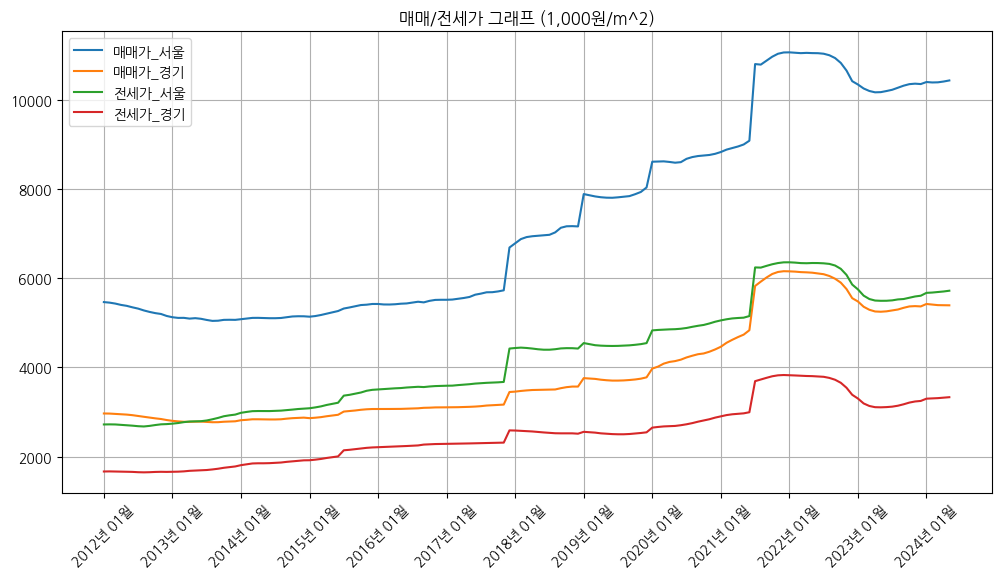

In [28]:
plt.figure(figsize=(12, 6)) 
plt.plot(price_total, label=price_total.columns) 
plt.title('매매/전세가 그래프 (1,000원/m^2)')
plt.xticks(range(0, len(price_total), 12), price_total.index[::12], rotation=45) 
plt.legend() 
plt.grid() 
plt.show() 

- 지수 통합 그래프 

In [29]:
price_factor_total = pd.concat([data_trade_factor, data_js_factor], axis=1) 
price_factor_total.columns = ['매매가지수_서울', '매매가지수_경기', '전세가지수_서울', '전세가지수_경기'] 
price_factor_total 

,매매가지수_서울,매매가지수_경기,전세가지수_서울,전세가지수_경기
2003년 11월,55.603,56.370,55.598,52.449
2003년 12월,55.203,55.992,54.716,51.745
2004년 01월,55.055,55.681,54.381,51.378
2004년 02월,55.275,55.741,54.458,51.493
2004년 03월,55.506,55.876,54.551,51.756
...,...,...,...,...
2024년 01월,96.625,94.964,91.104,90.315
2024년 02월,96.539,94.769,91.215,90.425
2024년 03월,96.537,94.591,91.386,90.547
2024년 04월,96.622,94.525,91.546,90.731


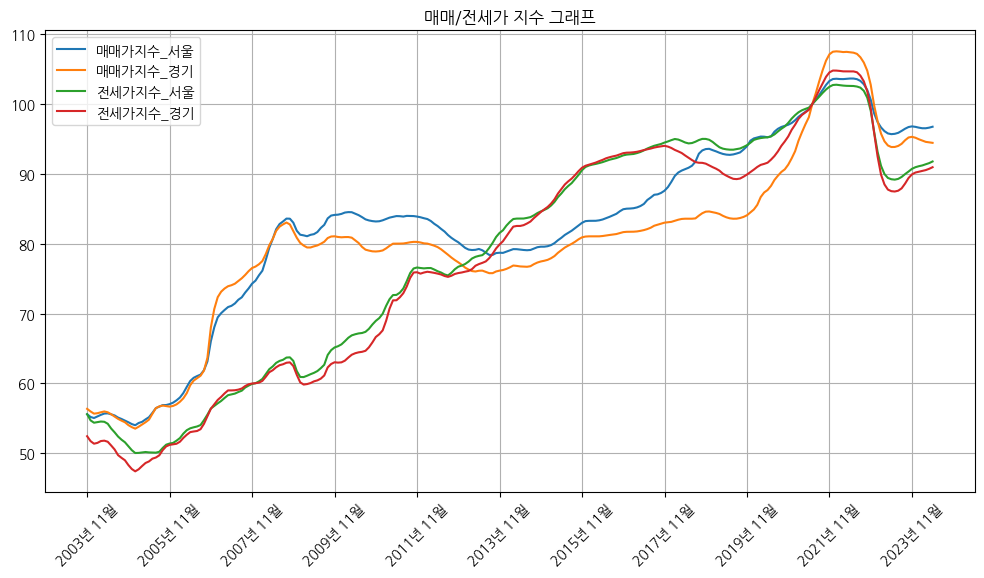

In [30]:
plt.figure(figsize=(12, 6)) 
plt.plot(price_factor_total, label=price_factor_total.columns) 
plt.title('매매/전세가 지수 그래프')
plt.xticks(range(0, len(price_factor_total), 24), price_factor_total.index[::24], rotation=45) 
plt.legend() 
plt.grid() 
plt.show() 

# 집값 데이터 정규화 분석 

## 평균 단위 매매 가격 정규화 

In [31]:
data_trade_raw = pd.read_excel("../data/housing_data/평균단위매매가격_종합_시군구권역별_수정.xlsx", skiprows=10, nrows=26, usecols='A:ET') 
print(data_trade_raw.info()) 
data_trade_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 150 entries, 지 역 to 2024년 05월
dtypes: int64(138), object(12)
memory usage: 29.4+ KB
None


,지 역,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,...,2023년 08월,2023년 09월,2023년 10월,2023년 11월,2023년 12월,2024년 01월,2024년 02월,2024년 03월,2024년 04월,2024년 05월
0,전국,2610,2608,2604,2598,2591,2581,2569,2556,2544,...,4529,4549,4565,4568,4563,4609,4601,4595,4595,4598
1,서울,5465,5453,5432,5402,5381,5348,5319,5278,5245,...,10268,10315,10349,10360,10351,10397,10387,10390,10408,10432
2,경기,2969,2967,2960,2953,2944,2931,2914,2895,2877,...,5299,5337,5368,5375,5368,5423,5409,5397,5394,5393
3,경부1권,4426,4422,4415,4404,4392,4372,4343,4310,4271,...,8749,8823,8883,8909,8900,8993,8960,8929,8912,8915
4,경부2권,2929,2928,2920,2909,2901,2886,2879,2864,2842,...,5321,5365,5393,5402,5395,5425,5409,5403,5410,5414


In [32]:
data_trade_raw.set_index('지 역', inplace=True) 
data_trade_raw = data_trade_raw.transpose() 
data_trade_raw.head() 

지 역,전국,서울,경기,경부1권,경부2권,서해안권,동부1권,동부2권,경의권,경원권,...,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2012년 01월,2610,5465,2969,4426,2929,2784,2815,1231,2790,2018,...,2095,-,1067,1258,1046,1110,781,945,1713,943
2012년 02월,2608,5453,2967,4422,2928,2780,2813,1232,2790,2020,...,2112,-,1072,1260,1048,1112,783,947,1711,962
2012년 03월,2604,5432,2960,4415,2920,2778,2804,1231,2778,2017,...,2126,-,1075,1265,1054,1120,782,952,1712,964
2012년 04월,2598,5402,2953,4404,2909,2775,2794,1230,2765,2015,...,2141,-,1078,1270,1058,1122,786,956,1709,970
2012년 05월,2591,5381,2944,4392,2901,2768,2779,1230,2752,2011,...,2154,-,1078,1275,1062,1120,787,960,1705,983


In [33]:
data_trade = data_trade_raw[['서울', '경기']] 
data_trade = data_trade.astype('int') 
print(data_trade.info()) 
data_trade.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 2012년 01월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      149 non-null    int64
 1   경기      149 non-null    int64
dtypes: int64(2)
memory usage: 3.5+ KB
None


지 역,서울,경기
2012년 01월,5465,2969
2012년 02월,5453,2967
2012년 03월,5432,2960
2012년 04월,5402,2953
2012년 05월,5381,2944


In [34]:
# normalization 
data_trade['서울'] = data_trade['서울'] / data_trade['서울'].max() 
data_trade['경기'] = data_trade['경기'] / data_trade['경기'].max() 

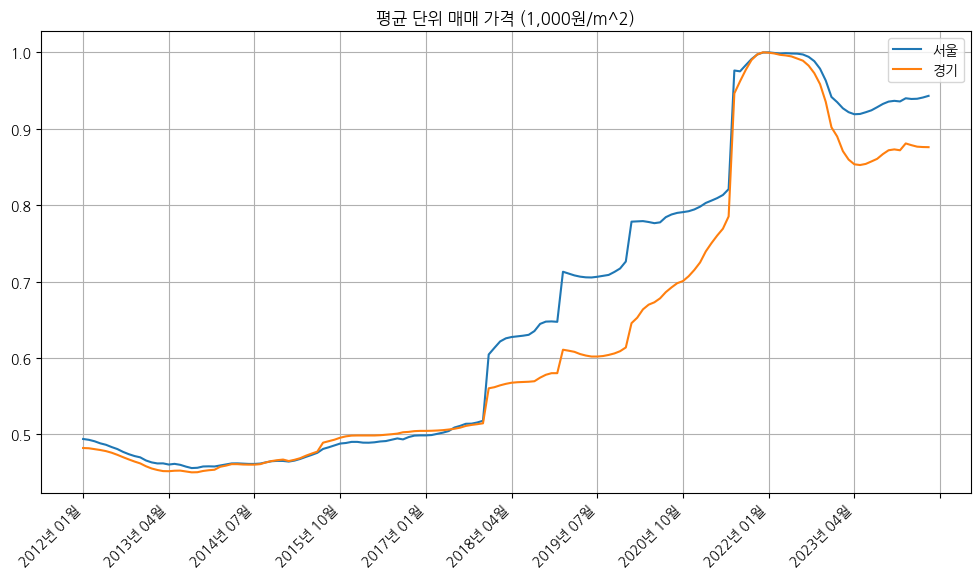

In [35]:
# xticks manipilation 
data = data_trade 
dates = pd.date_range('2012-01-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('평균 단위 매매 가격 (1,000원/m^2)')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [36]:
data_trade.to_csv('../data/housing_data/custom_price_trade_norm.csv') 

## 평균 단위 전세 가격 정규화 

In [37]:
data_js_raw = pd.read_excel("../data/housing_data/평균단위전세가격_종합_시군구권역별_수정.xlsx", skiprows=10, nrows=30, usecols='A:ET') 
print(data_js_raw.info()) 
data_js_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 150 entries, 지 역 to 2024년 05월
dtypes: int64(138), object(12)
memory usage: 35.3+ KB
None


,지 역,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,...,2023년 08월,2023년 09월,2023년 10월,2023년 11월,2023년 12월,2024년 01월,2024년 02월,2024년 03월,2024년 04월,2024년 05월
0,전국,1476,1477,1478,1477,1476,1474,1469,1467,1472,...,2668,2679,2696,2709,2716,2756,2759,2762,2767,2773
1,수도권,2020,2022,2021,2016,2011,2006,1999,1995,2002,...,3890,3912,3943,3967,3979,4028,4034,4044,4055,4069
2,지방권,971,973,976,978,980,981,980,979,980,...,1613,1615,1618,1622,1623,1651,1650,1648,1647,1647
3,6대광역시,1307,1307,1310,1313,1316,1316,1314,1312,1315,...,2168,2172,2177,2181,2182,2221,2221,2223,2226,2229
4,5대광역시,1311,1311,1316,1319,1322,1322,1320,1317,1319,...,2126,2126,2129,2133,2134,2172,2170,2168,2168,2167


In [38]:
data_js_raw.set_index('지 역', inplace=True) 
data_js_raw = data_js_raw.transpose() 
data_js_raw.head() 

지 역,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,경기,경부1권,...,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남
2012년 01월,1476,2020,971,1307,1311,1142,750,2723,1669,2477,...,1325,1422,-,681,836,651,765,516,626,1056
2012년 02월,1477,2022,973,1307,1311,1144,752,2725,1671,2481,...,1312,1435,-,685,837,655,765,517,628,1055
2012년 03월,1478,2021,976,1310,1316,1144,754,2723,1669,2475,...,1305,1449,-,691,833,661,770,513,633,1056
2012년 04월,1477,2016,978,1313,1319,1145,757,2714,1667,2470,...,1300,1461,-,692,836,664,773,516,635,1057
2012년 05월,1476,2011,980,1316,1322,1144,758,2704,1663,2464,...,1293,1472,-,692,839,667,772,518,638,1055


In [39]:
data_js = data_js_raw[['서울', '경기']] 
data_js = data_js.astype('int') 
print(data_js.info()) 
data_js.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 2012년 01월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      149 non-null    int64
 1   경기      149 non-null    int64
dtypes: int64(2)
memory usage: 3.5+ KB
None


지 역,서울,경기
2012년 01월,2723,1669
2012년 02월,2725,1671
2012년 03월,2723,1669
2012년 04월,2714,1667
2012년 05월,2704,1663


In [40]:
# normalization 
data_js['서울'] = data_js['서울'] / data_js['서울'].max() 
data_js['경기'] = data_js['경기'] / data_js['경기'].max() 

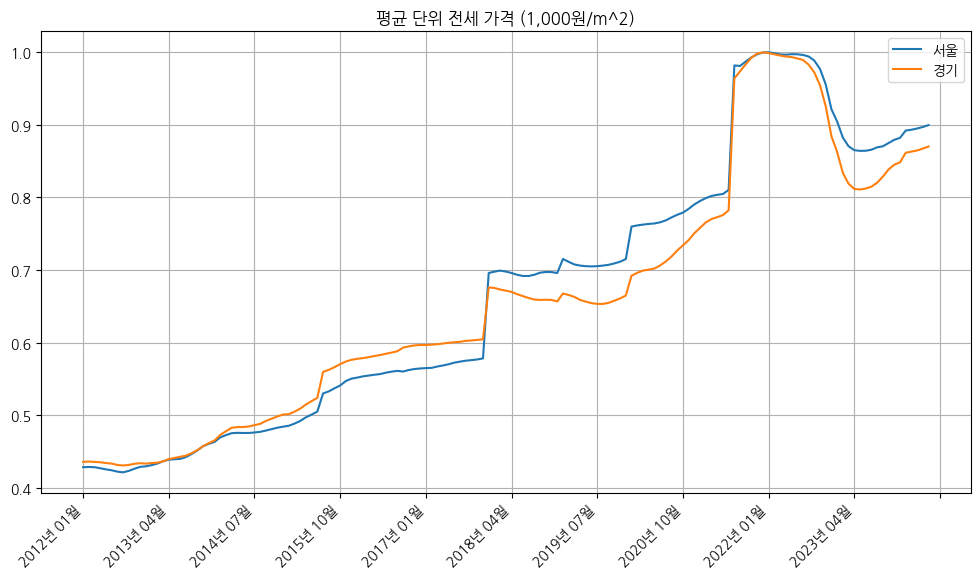

In [41]:
data = data_js
dates = pd.date_range('2012-01-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('평균 단위 전세 가격 (1,000원/m^2)')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [42]:
data_js.to_csv('../data/housing_data/custom_price_js_norm.csv') 

## 매매가격지수 데이터 정규화 

In [43]:
data_trade_factor_raw = pd.read_excel("../data/housing_data/매매가격지수_종합_시군구권역별_수정.xlsx", skiprows=10, nrows=20, usecols='A:SA') 
print(data_trade_factor_raw.info()) 
data_trade_factor_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 495 entries, 지 역 to Unnamed: 494
dtypes: object(495)
memory usage: 73.6+ KB
None


,지 역,2003년 11월,Unnamed: 2,2003년 12월,Unnamed: 4,2004년 01월,Unnamed: 6,2004년 02월,Unnamed: 8,2004년 03월,...,2024년 01월,Unnamed: 486,2024년 02월,Unnamed: 488,2024년 03월,Unnamed: 490,2024년 04월,Unnamed: 492,2024년 05월,Unnamed: 494
0,NaN,지수,변동률,지수,변동률,지수,변동률,지수,변동률,지수,...,지수,변동률,지수,변동률,지수,변동률,지수,변동률,지수,변동률
1,전국,61.452,-,60.963,-0.8,60.652,-0.51,60.744,0.15,60.842,...,96.04,-0.14,95.902,-0.14,95.787,-0.12,95.738,-0.05,95.717,-0.02
2,서울,55.603,-,55.203,-0.72,55.055,-0.27,55.275,0.4,55.506,...,96.625,-0.12,96.539,-0.09,96.537,0,96.622,0.09,96.755,0.14
3,경기,56.37,-,55.992,-0.67,55.681,-0.56,55.741,0.11,55.876,...,94.964,-0.23,94.769,-0.21,94.591,-0.19,94.525,-0.07,94.449,-0.08
4,인천,55.916,-,55.379,-0.96,55.047,-0.6,54.982,-0.12,54.904,...,94.029,-0.15,93.93,-0.1,93.871,-0.06,93.826,-0.05,93.893,0.07


In [44]:
data_trade_factor_raw.set_index('지 역', inplace=True) 
drop_idx = list(range(1, data_trade_factor_raw.shape[1], 2)) 
data_trade_factor_raw.drop(data_trade_factor_raw.columns[drop_idx], axis=1, inplace=True) 
data_trade_factor_raw.drop(data_trade_factor_raw.index[0], inplace=True) 
data_trade_factor_raw = data_trade_factor_raw.transpose() 
data_trade_factor_raw.head() 

지 역,전국,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2003년 11월,61.452,55.603,56.37,55.916,66.401,58.185,61.892,59.585,56.745,-,73.392,69.174,80.303,70.257,70.507,77.933,70.243,99.854
2003년 12월,60.963,55.203,55.992,55.379,65.705,57.463,61.547,58.68,56.277,-,73.442,68.309,79.123,70.045,69.598,77.631,69.944,99.811
2004년 01월,60.652,55.055,55.681,55.047,65.177,57.027,61.256,58.712,55.868,-,73.395,68.1,78.893,69.849,69.38,77.189,69.688,95.083
2004년 02월,60.744,55.275,55.741,54.982,65.123,56.961,61.241,59.071,56.082,-,73.792,68.177,79.495,70.068,69.223,77.034,69.879,93.104
2004년 03월,60.842,55.506,55.876,54.904,65.13,57.133,61.298,59.252,56.284,-,74.196,68.246,79.914,69.968,68.647,76.908,70.147,89.198


In [45]:
data_trade_factor = data_trade_factor_raw[['서울', '경기']] 
data_trade_factor = data_trade_factor.astype('float') 
print(data_trade_factor.info()) 
data_trade_factor.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 2003년 11월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      247 non-null    float64
 1   경기      247 non-null    float64
dtypes: float64(2)
memory usage: 5.8+ KB
None


지 역,서울,경기
2003년 11월,55.603,56.370
2003년 12월,55.203,55.992
2004년 01월,55.055,55.681
2004년 02월,55.275,55.741
2004년 03월,55.506,55.876


In [46]:
# normalization 
data_trade_factor['서울'] = data_trade_factor['서울'] / data_trade_factor['서울'].max() 
data_trade_factor['경기'] = data_trade_factor['경기'] / data_trade_factor['경기'].max() 

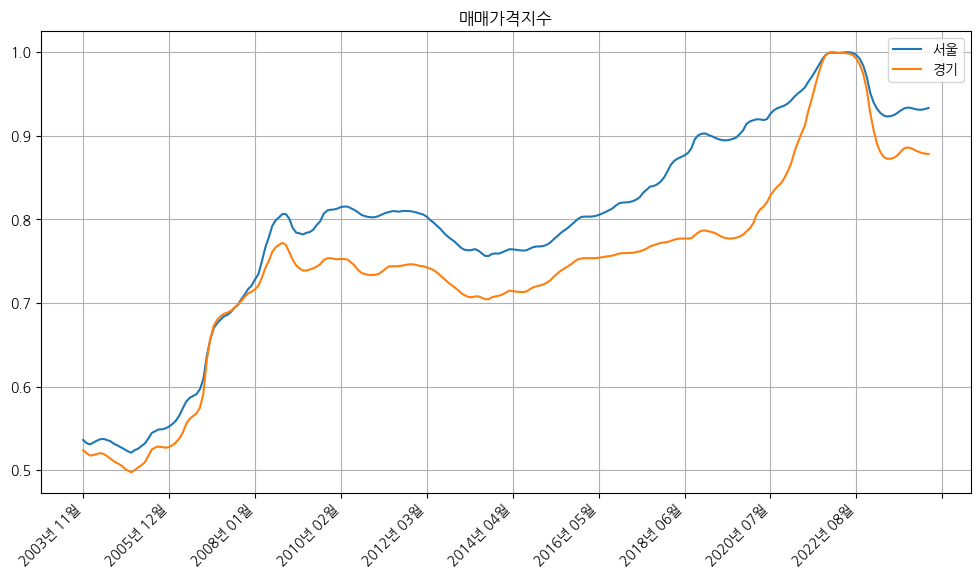

In [47]:
data = data_trade_factor
dates = pd.date_range('2003-11-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('매매가격지수')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [48]:
data_trade_factor.to_csv('../data/housing_data/custom_factor_trade_norm.csv') 

## 전세가격지수 데이터 정규화 

In [49]:
data_js_factor_raw = pd.read_excel("../data/housing_data/전세가격지수_종합_시군구권역별_수정.xlsx", skiprows=10, nrows=20, usecols='A:SA') 
print(data_js_factor_raw.info()) 
data_js_factor_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 495 entries, 지 역 to Unnamed: 494
dtypes: object(495)
memory usage: 73.6+ KB
None


,지 역,2003년 11월,Unnamed: 2,2003년 12월,Unnamed: 4,2004년 01월,Unnamed: 6,2004년 02월,Unnamed: 8,2004년 03월,...,2024년 01월,Unnamed: 486,2024년 02월,Unnamed: 488,2024년 03월,Unnamed: 490,2024년 04월,Unnamed: 492,2024년 05월,Unnamed: 494
0,NaN,지수,변동률,지수,변동률,지수,변동률,지수,변동률,지수,...,지수,변동률,지수,변동률,지수,변동률,지수,변동률,지수,변동률
1,전국,60.353,-,59.575,-1.29,59.21,-0.61,59.307,0.16,59.467,...,92.545,0.05,92.57,0.03,92.614,0.05,92.677,0.07,92.791,0.12
2,서울,55.598,-,54.716,-1.59,54.381,-0.61,54.458,0.14,54.551,...,91.104,0.16,91.215,0.12,91.386,0.19,91.546,0.18,91.782,0.26
3,경기,52.449,-,51.745,-1.34,51.378,-0.71,51.493,0.22,51.756,...,90.315,0.13,90.425,0.12,90.547,0.13,90.731,0.2,90.961,0.25
4,인천,56,-,55.162,-1.5,54.558,-1.1,54.523,-0.07,54.581,...,88.149,0.01,88.357,0.24,88.732,0.42,88.998,0.3,89.417,0.47


In [50]:
data_js_factor_raw.set_index('지 역', inplace=True) 
drop_idx = list(range(1, data_js_factor_raw.shape[1], 2)) 
data_js_factor_raw.drop(data_js_factor_raw.columns[drop_idx], axis=1, inplace=True) 
data_js_factor_raw.drop(data_js_factor_raw.index[0], inplace=True) 
data_js_factor_raw = data_js_factor_raw.transpose() 
data_js_factor_raw.head() 

지 역,전국,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2003년 11월,60.353,55.598,52.449,56,67.811,62.161,61.767,56.826,58.332,-,75.433,64.815,69.015,66.693,64.299,79.758,69.397,89.606
2003년 12월,59.575,54.716,51.745,55.162,67.137,60.596,61.614,56.239,57.66,-,75.069,63.776,67.605,66.408,64.207,79.487,68.788,89.591
2004년 01월,59.21,54.381,51.378,54.558,66.698,59.341,61.359,56.458,57.554,-,75.094,63.486,67.436,66.312,64.004,79.034,68.657,91.191
2004년 02월,59.307,54.458,51.493,54.523,66.662,59.217,61.259,56.948,57.952,-,75.684,64.152,68.35,66.459,64.007,78.935,68.64,89.522
2004년 03월,59.467,54.551,51.756,54.581,66.856,59.227,61.733,56.975,58.205,-,76.207,63.869,68.97,66.67,64.152,78.86,68.909,87.391


In [51]:
data_js_factor = data_js_factor_raw[['서울', '경기']] 
data_js_factor = data_js_factor.astype('float') 
print(data_js_factor.info()) 
data_js_factor.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 2003년 11월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      247 non-null    float64
 1   경기      247 non-null    float64
dtypes: float64(2)
memory usage: 5.8+ KB
None


지 역,서울,경기
2003년 11월,55.598,52.449
2003년 12월,54.716,51.745
2004년 01월,54.381,51.378
2004년 02월,54.458,51.493
2004년 03월,54.551,51.756


In [52]:
# normalization 
data_js_factor['서울'] = data_js_factor['서울'] / data_js_factor['서울'].max() 
data_js_factor['경기'] = data_js_factor['경기'] / data_js_factor['경기'].max() 

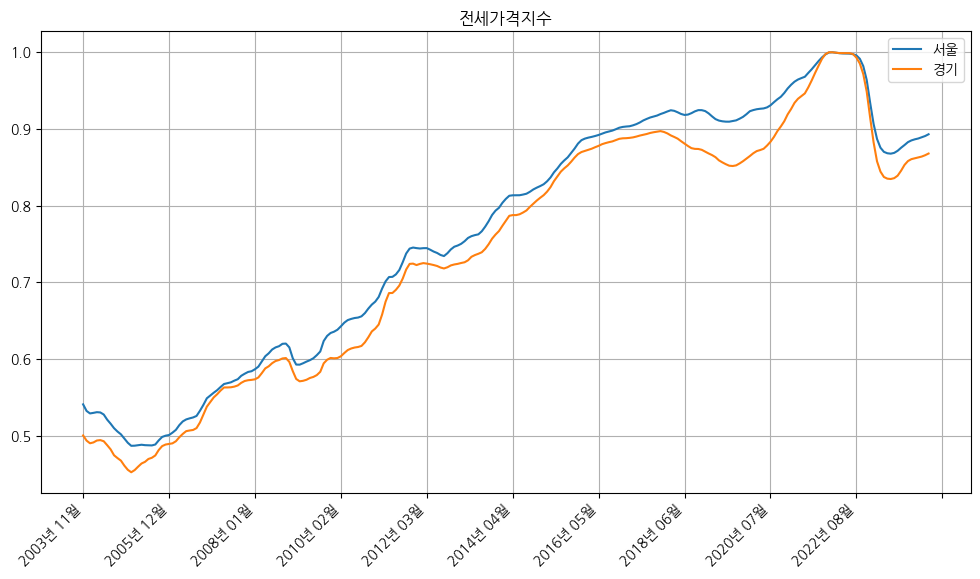

In [53]:
data = data_js_factor
dates = pd.date_range('2003-11-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('전세가격지수')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [54]:
data_js_factor.to_csv('../data/housing_data/custom_factor_js_norm.csv') 

## 월별 주택 거래량 정규화 

In [55]:
data_trade_count_raw = pd.read_excel("../data/housing_data/월별_주택거래_수정.xlsx", skiprows=10, nrows=20, usecols="A:QA") 
print(data_trade_count_raw.info()) 
data_trade_count_raw.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 443 entries, 지 역 to Unnamed: 442
dtypes: object(443)
memory usage: 65.9+ KB
None


,지 역,2006년 01월,Unnamed: 2,2006년 02월,Unnamed: 4,2006년 03월,Unnamed: 6,2006년 04월,Unnamed: 8,2006년 05월,...,2024년 01월,Unnamed: 434,2024년 02월,Unnamed: 436,2024년 03월,Unnamed: 438,2024년 04월,Unnamed: 440,2024년 05월,Unnamed: 442
0,NaN,동(호),면적,동(호),면적,동(호),면적,동(호),면적,동(호),...,동(호),면적,동(호),면적,동(호),면적,동(호),면적,동(호),면적
1,전국,77173,7380,103718,8535,133120,11005,118127,9681,121835,...,81330,6248,70792,5383,82007,6262,92016,7072,81023,6231
2,서울,11134,976,18818,1599,26501,2173,24970,2046,27652,...,9121,570,7780,529,7991,522,10688,745,10804,760
3,부산,5722,520,7428,643,8117,707,7503,633,7764,...,6817,513,4220,298,4654,332,4444,322,4298,304
4,대구,4743,427,6265,569,6779,614,6000,565,5354,...,3280,266,2717,218,3267,262,3547,294,3433,281


In [56]:
data_trade_count_raw.set_index('지 역', inplace=True) 
drop_idx = list(range(1, data_trade_count_raw.shape[1], 2)) 
data_trade_count_raw.drop(data_trade_count_raw.columns[drop_idx], axis=1, inplace=True) 
data_trade_count_raw.drop(data_trade_count_raw.index[0], inplace=True) 
data_trade_count_raw = data_trade_count_raw.transpose() 
data_trade_count_raw.head() 

지 역,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2006년 01월,77173,11134,5722,4743,3638,4046,2699,1821,-,20852,2408,1920,2960,2383,1149,4802,5559,1337
2006년 02월,103718,18818,7428,6265,5856,4338,3801,2888,-,25701,3289,3679,4244,2846,1717,5759,5965,1124
2006년 03월,133120,26501,8117,6779,7289,5867,6785,3612,-,36072,4165,3773,5234,3363,2554,5774,5991,1244
2006년 04월,118127,24970,7503,6000,7007,4971,4037,3218,-,33258,3130,2510,4351,3430,2291,5326,5653,472
2006년 05월,121835,27652,7764,5354,7419,3498,3261,3713,-,36701,3411,2871,3769,2721,2700,4916,5533,552


In [57]:
data_trade_count = data_trade_count_raw[['서울', '경기']] 
data_trade_count = data_trade_count.astype('int') 
print(data_trade_count.info()) 
data_trade_count.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 2006년 01월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      221 non-null    int64
 1   경기      221 non-null    int64
dtypes: int64(2)
memory usage: 5.2+ KB
None


지 역,서울,경기
2006년 01월,11134,20852
2006년 02월,18818,25701
2006년 03월,26501,36072
2006년 04월,24970,33258
2006년 05월,27652,36701


In [58]:
# normalization 
data_trade_count['서울'] = data_trade_count['서울'] / data_trade_count['서울'].max() 
data_trade_count['경기'] = data_trade_count['경기'] / data_trade_count['경기'].max() 

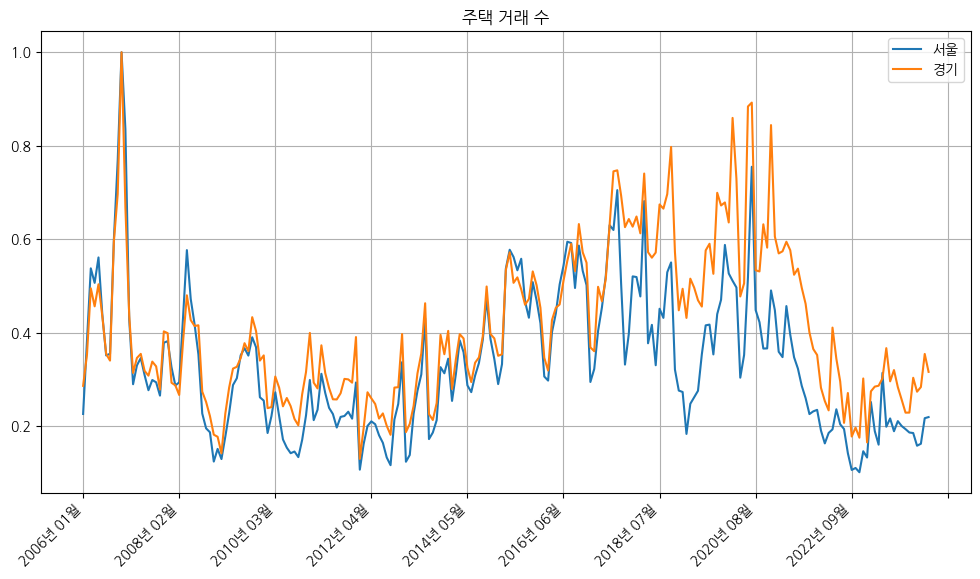

In [59]:
data = data_trade_count
dates = pd.date_range('2006-01-01', periods=data.index.__len__(), freq='M') 
data.index = dates 
data.index = data.index.strftime('%Y년 %m월') 

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.set_title('주택 거래 수')
ax.plot(data.index, data, label=data.columns) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.grid() 
plt.show() 

In [60]:
data_trade_count.to_csv('../data/housing_data/custom_trade_count_norm.csv') 

## 정규화 데이터 통합 그래프 

- 가격 통합 그래프 

In [61]:
price_total = pd.concat([data_trade, data_js], axis=1) 
price_total.columns = ['매매가_서울', '매매가_경기', '전세가_서울', '전세가_경기'] 
price_total 

,매매가_서울,매매가_경기,전세가_서울,전세가_경기
2012년 01월,0.494034,0.482215,0.428347,0.435656
2012년 02월,0.492949,0.481891,0.428661,0.436179
2012년 03월,0.491050,0.480754,0.428347,0.435656
2012년 04월,0.488338,0.479617,0.426931,0.435134
2012년 05월,0.486440,0.478155,0.425358,0.434090
...,...,...,...,...
2024년 01월,0.939884,0.880786,0.892245,0.861655
2024년 02월,0.938980,0.878512,0.893346,0.863221
2024년 03월,0.939251,0.876563,0.895076,0.864787
2024년 04월,0.940879,0.876076,0.897121,0.867398


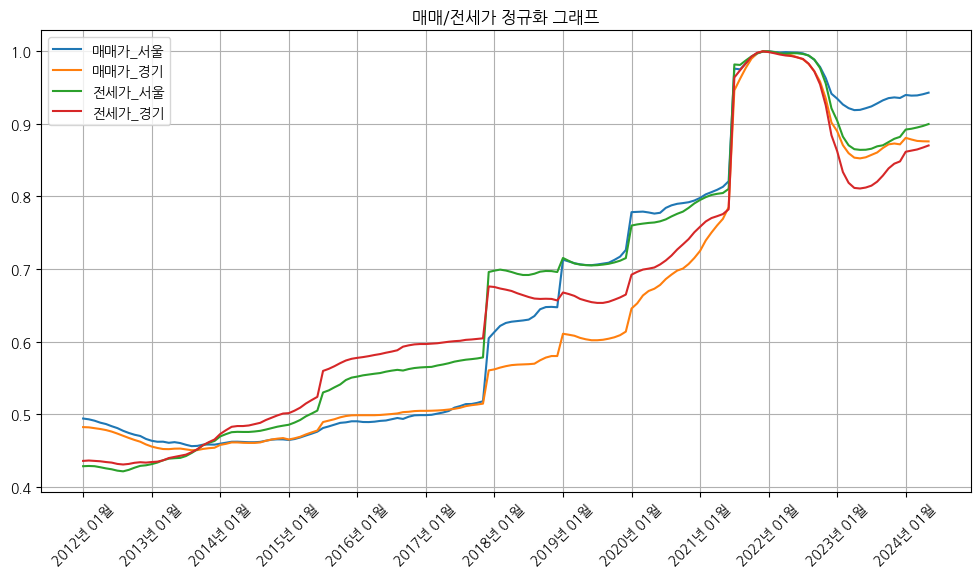

In [62]:
plt.figure(figsize=(12, 6)) 
plt.plot(price_total, label=price_total.columns) 
plt.title('매매/전세가 정규화 그래프')
plt.xticks(range(0, len(price_total), 12), price_total.index[::12], rotation=45) 
plt.legend() 
plt.grid() 
plt.show() 

- 지수 통합 그래프 

In [63]:
price_factor_total = pd.concat([data_trade_factor, data_js_factor], axis=1) 
price_factor_total.columns = ['매매가지수_서울', '매매가지수_경기', '전세가지수_서울', '전세가지수_경기'] 
price_factor_total 

,매매가지수_서울,매매가지수_경기,전세가지수_서울,전세가지수_경기
2003년 11월,0.536408,0.524133,0.541000,0.500477
2003년 12월,0.532549,0.520619,0.532417,0.493759
2004년 01월,0.531122,0.517727,0.529158,0.490257
2004년 02월,0.533244,0.518285,0.529907,0.491355
2004년 03월,0.535472,0.519540,0.530812,0.493864
...,...,...,...,...
2024년 01월,0.932152,0.882984,0.886493,0.861801
2024년 02월,0.931322,0.881170,0.887573,0.862850
2024년 03월,0.931303,0.879515,0.889237,0.864015
2024년 04월,0.932123,0.878902,0.890794,0.865770


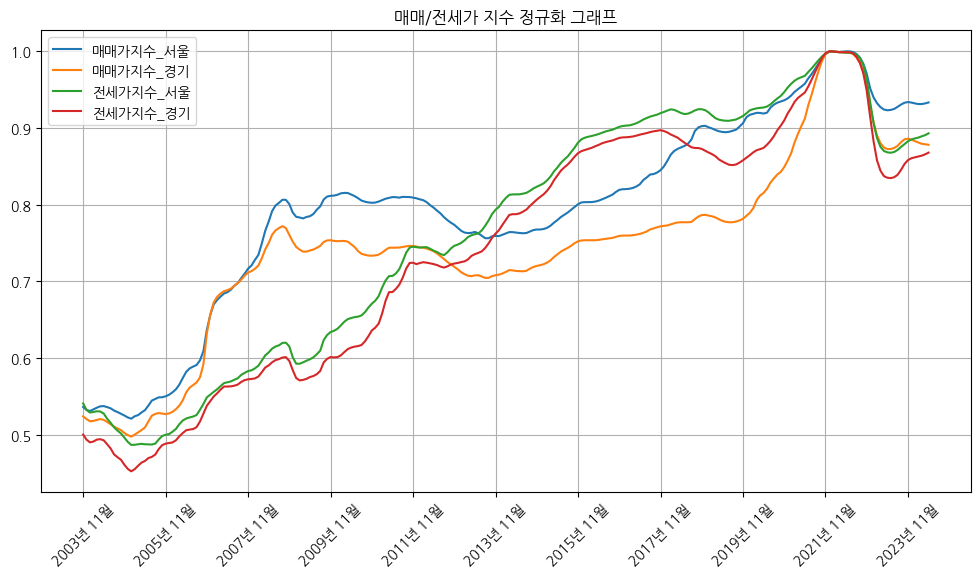

In [64]:
plt.figure(figsize=(12, 6)) 
plt.plot(price_factor_total, label=price_factor_total.columns) 
plt.title('매매/전세가 지수 정규화 그래프')
plt.xticks(range(0, len(price_factor_total), 24), price_factor_total.index[::24], rotation=45) 
plt.legend() 
plt.grid() 
plt.show() 

# 집값과 인구수 비교 

- 인구 데이터 전처리 

In [65]:
data_pop_raw = pd.read_csv('../data/housing_data/custom_population.csv') 
data_pop_raw = data_pop_raw.set_index('Unnamed: 0') 
data_price_trade_raw = pd.read_csv('../data/housing_data/custom_price_trade.csv') 
data_price_trade_raw = data_price_trade_raw.set_index('Unnamed: 0') 
data_price_js_raw = pd.read_csv('../data/housing_data/custom_price_js.csv') 
data_price_js_raw = data_price_js_raw.set_index('Unnamed: 0') 
data_factor_trade_raw = pd.read_csv('../data/housing_data/custom_factor_trade.csv') 
data_factor_trade_raw = data_factor_trade_raw.set_index('Unnamed: 0') 
data_factor_js_raw = pd.read_csv('../data/housing_data/custom_factor_js.csv') 
data_factor_js_raw = data_factor_js_raw.set_index('Unnamed: 0') 
data_trade_count_raw = pd.read_csv('../data/housing_data/custom_trade_count.csv') 
data_trade_count_raw = data_trade_count_raw.set_index('Unnamed: 0') 

In [66]:
data_pop = data_pop_raw.iloc[-150:-1, :] 
data_pop = data_pop[['서울특별시', '경기도']]
print(data_pop.info()) 
data_pop 

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 2012년 01월 to 2024년 05월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울특별시   149 non-null    int64
 1   경기도     149 non-null    int64
dtypes: int64(2)
memory usage: 3.5+ KB
None


,서울특별시,경기도
Unnamed: 0,,
2012년 01월,10250134,11948596
2012년 02월,10251297,11961481
2012년 03월,10245782,11972408
2012년 04월,10241387,11984985
2012년 05월,10237054,11998173
...,...,...
2024년 01월,9384325,13635250
2024년 02월,9386705,13639616
2024년 03월,9384739,13642451


In [67]:
data_pop = data_pop_raw[['서울특별시', '경기도']]
data_price_trade = data_price_trade_raw[['서울', '경기']] 
data_price_js = data_price_js_raw[['서울', '경기']] 
data_factor_trade = data_factor_trade_raw[['서울', '경기']] 
data_factor_js = data_factor_js_raw[['서울', '경기']] 
data_trade_count = data_trade_count_raw[['서울', '경기']] 

- 집값 데이터 전처리 

In [68]:
data_pop = data_pop.iloc[-150:-1, :] 
data_pop.columns = ['인구_서울', '인구_경기']
data_price_trade = data_price_trade.iloc[-149:, :] 
data_price_trade.columns = ['매매가_서울', '매매가_경기']
data_price_js = data_price_js.iloc[-149:, :] 
data_price_js.columns = ['전세가_서울', '전세가_경기'] 
data_factor_trade = data_factor_trade.iloc[-149:, :] 
data_factor_trade.columns = ['매매가지수_서울', '매매가지수_경기'] 
data_factor_js = data_factor_js.iloc[-149:, :] 
data_factor_js.columns = ['전세가지수_서울', '전세가지수_경기'] 
data_trade_count = data_trade_count.iloc[-149:, :] 
data_trade_count.columns = ['거래량_서울', '거래량_경기'] 

- 데이터 종합 

In [69]:
data_total = pd.concat([data_pop, data_price_trade, data_price_js, 
                        data_factor_trade, data_factor_js, data_trade_count], axis=1) 

data_total.columns

Index(['인구_서울', '인구_경기', '매매가_서울', '매매가_경기', '전세가_서울', '전세가_경기', '매매가지수_서울',
       '매매가지수_경기', '전세가지수_서울', '전세가지수_경기', '거래량_서울', '거래량_경기'],
      dtype='object')

In [70]:
data_total 

,인구_서울,인구_경기,매매가_서울,매매가_경기,전세가_서울,전세가_경기,매매가지수_서울,매매가지수_경기,전세가지수_서울,전세가지수_경기,거래량_서울,거래량_경기
Unnamed: 0,,,,,,,,,,,,
2012년 01월,10250134,11948596,5465,2969,2723,1669,83.658,80.061,76.478,75.884,5256,9455
2012년 02월,10251297,11961481,5453,2967,2725,1671,83.539,80.023,76.523,75.993,7973,14264
2012년 03월,10245782,11972408,5432,2960,2723,1669,83.263,79.884,76.528,75.923,9865,19848
2012년 04월,10241387,11984985,5402,2953,2714,1667,82.860,79.723,76.312,75.834,10353,18900
2012년 05월,10237054,11998173,5381,2944,2704,1663,82.535,79.520,76.065,75.727,10051,18024
...,...,...,...,...,...,...,...,...,...,...,...,...
2024년 01월,9384325,13635250,10397,5423,5672,3301,96.625,94.964,91.104,90.315,9121,22114
2024년 02월,9386705,13639616,10387,5409,5679,3307,96.539,94.769,91.215,90.425,7780,19939
2024년 03월,9384739,13642451,10390,5397,5690,3313,96.537,94.591,91.386,90.547,7991,20663


- 상관관계 히트맵 그리기 

In [71]:
corr_data_total = data_total.corr() 

<Axes: >

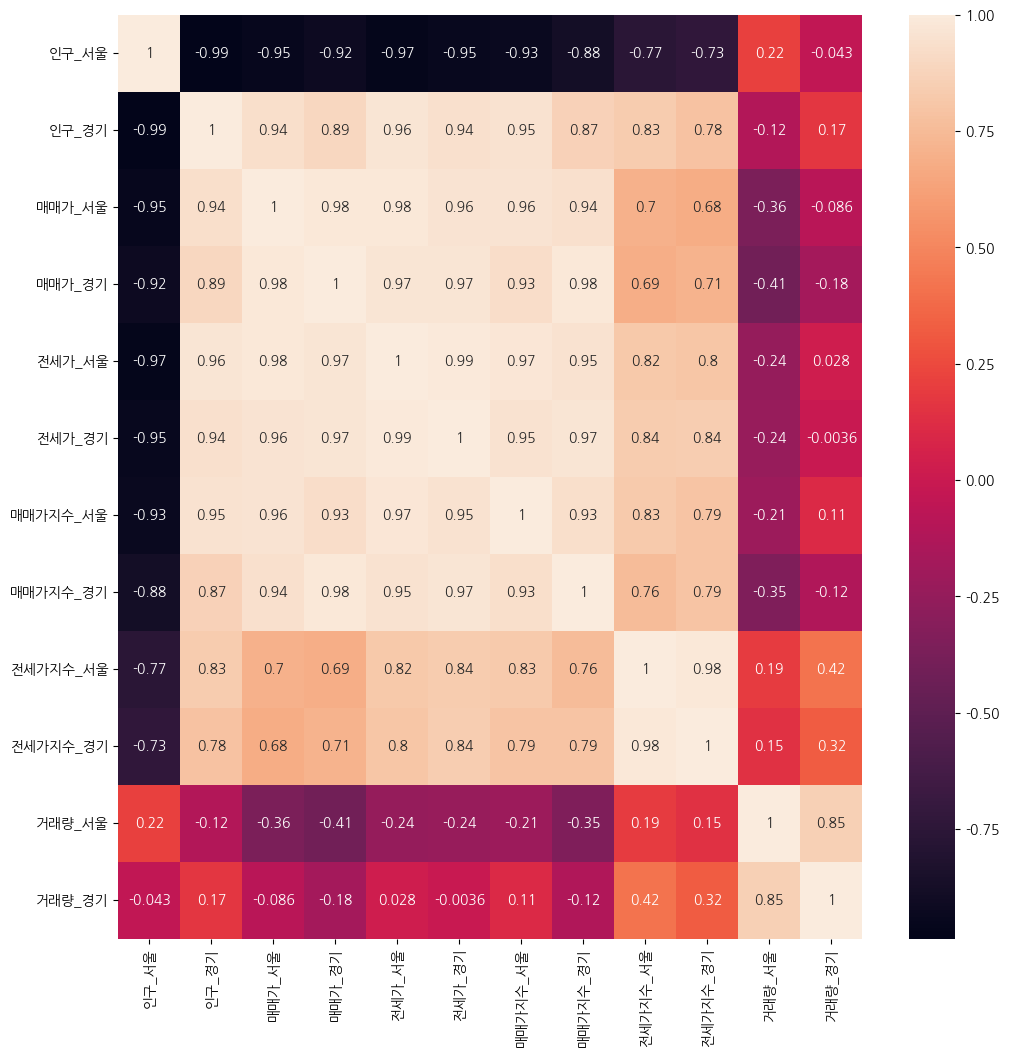

In [72]:
plt.figure(figsize=(12, 12)) 
sns.heatmap(corr_data_total, 
            annot=True) 